# Model Building for Cancer Detection
The model is built to detect whether patient has Type I Cancer, Type II Cancer or No cancer based on their cell measurements.

### Importing Libraries

In [1]:
#importing libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pickle

In [16]:
#load dataset
data=pd.read_csv('CancerPScreenRaw2020.csv')
data.shape

(1690, 10)

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,137.573925,151.719162,0.596020,23.629505,7.030695,0.580842,20.306659,40.032476,59.758293,0.0
1,116.496435,144.131710,0.559442,21.142454,7.302688,1.792108,16.222173,30.652238,45.082303,0.0
2,226.076027,194.559764,0.594095,29.937782,9.526411,10.851462,28.283713,45.715964,63.148214,1.0
3,100.359149,134.248998,0.555051,20.580689,5.855500,9.848190,20.564519,31.280848,41.997178,2.0
4,131.986704,150.623324,0.579484,23.986106,7.273814,30.388115,22.448860,14.509605,6.570351,2.0


In [4]:
#Pandas profiling
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
info = pp.ProfileReport(data)
info.to_file('cancer.html')
display(IFrame('cancer.html', width=900, height=350))

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [30]:
data.Class.value_counts()

2.0    560
1.0    560
0.0    560
Name: Class, dtype: int64

In [17]:
#Checking for missing values
data.isnull().sum()

V1       10
V2       10
V3       10
V4       10
V5       10
V6       10
V7       10
V8       10
V9       10
Class    10
dtype: int64

### Removing missing values

In [5]:
#Drop rows where all values are null 
data=data.dropna(how='all').reset_index(drop=True)
data.shape

(1680, 10)

In [6]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=data.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(data,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('V2', 'V1'), ('V4', 'V1'), ('V4', 'V2'), ('V5', 'V1'), ('V5', 'V2'), ('V5', 'V4'), ('V7', 'V1'), ('V7', 'V2'), ('V7', 'V4'), ('V7', 'V5'), ('V9', 'V8')]


<AxesSubplot:>

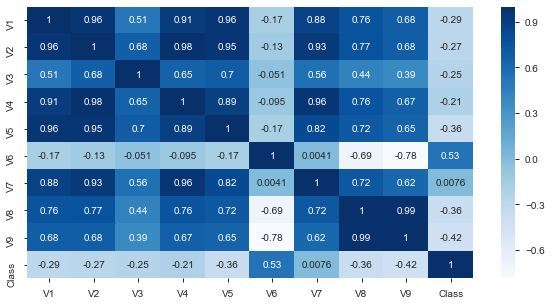

In [7]:
# Visualization of Correlations
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

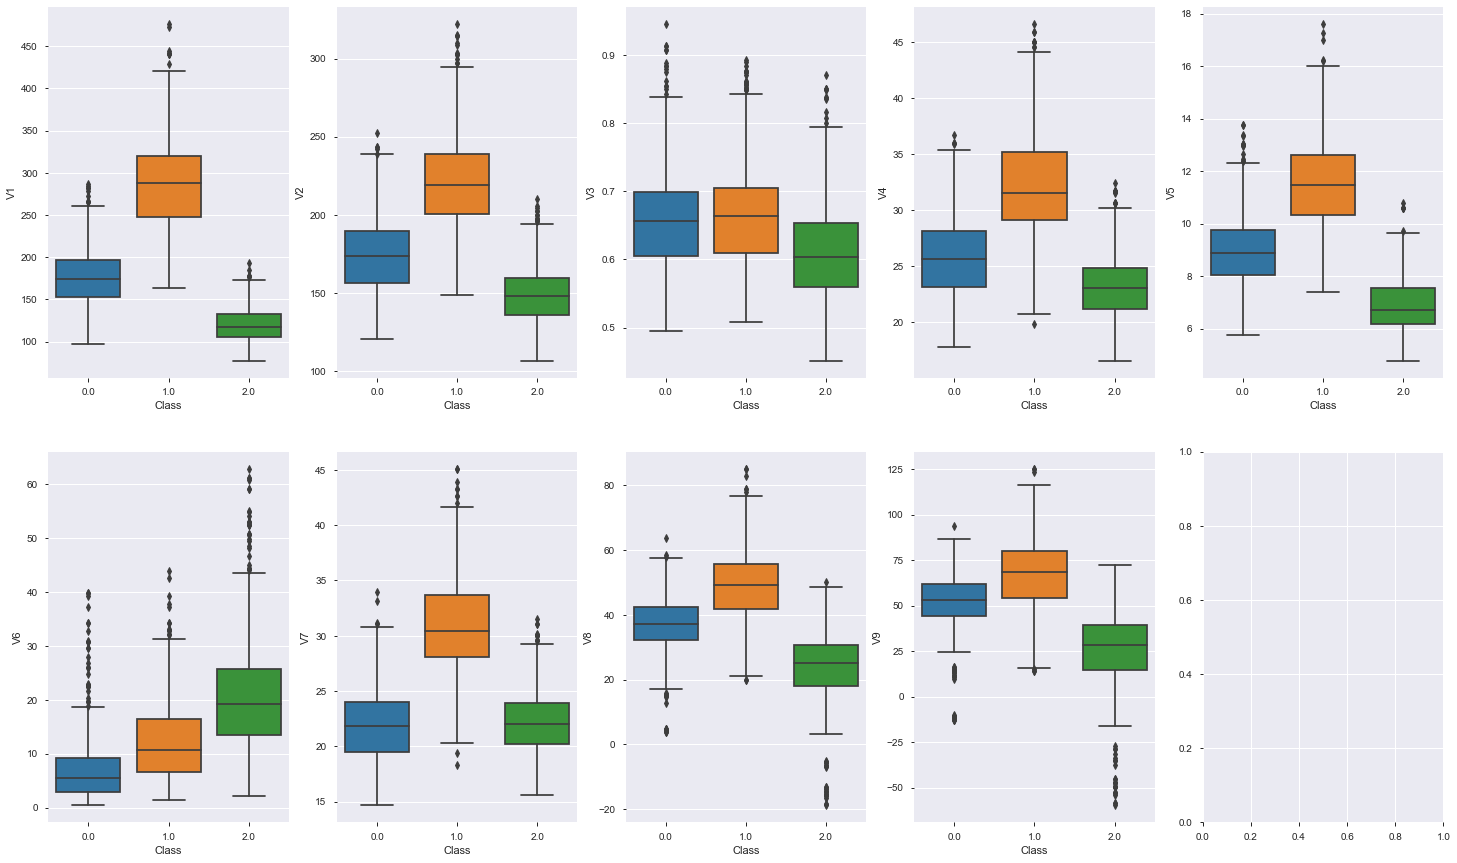

In [8]:
#Understanding the spread of data for each variable
fig,ax=plt.subplots(nrows=2 ,ncols=5)

sns.boxplot(data=data,y='V1',x='Class',ax=ax[0,0])
sns.boxplot(data=data,y='V2',x='Class',ax=ax[0,1])
sns.boxplot(data=data,y='V3',x='Class',ax=ax[0,2])
sns.boxplot(data=data,y='V4',x='Class',ax=ax[0,3])
sns.boxplot(data=data,y='V5',x='Class',ax=ax[0,4])
sns.boxplot(data=data,y='V6',x='Class',ax=ax[1,0])
sns.boxplot(data=data,y='V7',x='Class',ax=ax[1,1])
sns.boxplot(data=data,y='V8',x='Class',ax=ax[1,2])
sns.boxplot(data=data,y='V9',x='Class',ax=ax[1,3])

fig.set_figwidth(25)
fig.set_figheight(15)

In [9]:
#Replacing values in target variable for easy understanding
data['Class']=data['Class'].replace(0.0,'No Cancer')
data['Class']=data['Class'].replace(1.0,'Type I Cancer')
data['Class']=data['Class'].replace(2.0,'Type II Cancer')

In [10]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,137.573925,151.719162,0.596020,23.629505,7.030695,0.580842,20.306659,40.032476,59.758293,No Cancer
1,116.496435,144.131710,0.559442,21.142454,7.302688,1.792108,16.222173,30.652238,45.082303,No Cancer
2,226.076027,194.559764,0.594095,29.937782,9.526411,10.851462,28.283713,45.715964,63.148214,Type I Cancer
3,100.359149,134.248998,0.555051,20.580689,5.855500,9.848190,20.564519,31.280848,41.997178,Type II Cancer
4,131.986704,150.623324,0.579484,23.986106,7.273814,30.388115,22.448860,14.509605,6.570351,Type II Cancer


In [11]:
#Create x and y variables
x = data.drop('Class', axis=1)
Y = data['Class']

#Create Training Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.20,stratify=Y,random_state = 100)

In [47]:
#Scale the Data
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)
x_2 = sc.fit_transform(x)

# Generating classification report

In [12]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model
#Test the model
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

                precision    recall  f1-score   support

     No Cancer       0.96      0.96      0.96       112
 Type I Cancer       0.98      1.00      0.99       112
Type II Cancer       0.97      0.96      0.96       112

      accuracy                           0.97       336
     macro avg       0.97      0.97      0.97       336
  weighted avg       0.97      0.97      0.97       336

0.9702380952380952


# Saving the model in pickle

In [13]:
pickle.dump(model,open('model.pkl','wb'))

# Making Predictions

In [14]:
p=model.predict([[226.0760274,194.5597645,0.594094744,29.93778152,9.526411365,10.85146248,28.28371313,45.71596378,63.14821443
]])
print(p[0])

Type I Cancer
